In [1]:
import pickle
import os
import riversound, glob, obspy, matplotlib, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(os.getcwd()) # pickles are saved to cwd
from sklearn.metrics import r2_score

/home/scott/bender/gradschool/code/riversound/examples/Spring_2022_code/Boise_dams


In [ ]:
boise_sites = ['Ridenbaugh', 'Settlers', 'DivDam', 'FB0', 'FB1', 'FB2', 'FB4', 'FB5']
dcew_sites = ['CON1E', 'CON1W', 'LG']
boise_riffles = ['FB1', 'FB2', 'FB4', 'FB5']
regulated_jets = ['Ridenbaugh', 'DivDam']
boise_jets = ['Settlers', 'Ridenbaugh', 'DivDam']
dcew_riffles = ['CON1E', 'CON1W']
dcew_jets = ['LG']

years = ['21', '22']
years4 = ['22']
years2 = ['21']
seasons = ['Spring']

sites1 = dcew_riffles
sites2 = boise_jets 
sites3 = dcew_jets
sites4 = boise_riffles

fig, ax1 = plt.subplots(figsize = (12,6))
ax1.set_title('Boise River Plunging Jet Power Rating Curves')
ax1.set_xlabel('Discharge (m$^3$/s)', fontsize = 22)
ax1.set_ylabel('Power (Pa$^2$)', fontsize = 22)
fig, ax3 = plt.subplots(figsize = (12,6))
ax3.set_title('Boise River Plunging Jet Mean Frequency Rating Curves')
ax3.set_xlabel('Discharge (m$^3$/s)', fontsize = 22)
ax3.set_ylabel('Mean Frequency (Hz)', fontsize = 22)

fig, ax4 = plt.subplots(figsize = (12,6))
ax4.set_title('DCEW Power Rating Curves')
ax4.set_xlabel('Discharge (m$^3$/s)', fontsize = 22)
ax4.set_ylabel('Power (Pa$^2$)', fontsize = 22)
fig, ax5 = plt.subplots(figsize = (12,6))
ax5.set_title('DCEW Mean Frequency Rating Curves')
ax5.set_xlabel('Discharge (m$^3$/s)', fontsize = 22)
ax5.set_ylabel('Mean Frequency (Hz)', fontsize = 22)

fig, ax6 = plt.subplots(figsize = (12,6))
ax6.set_title('Boise Riffles Power Rating Curves')
ax6.set_xlabel('Discharge (m$^3$/s)', fontsize = 22)
ax6.set_ylabel('Power (Pa$^2$)', fontsize = 22)
fig, ax7 = plt.subplots(figsize = (12,6))
ax7.set_title('Boise Riffles Mean Frequency Rating Curves')
ax7.set_xlabel('Discharge (m$^3$/s)', fontsize = 22)
ax7.set_ylabel('Mean Frequency (Hz)', fontsize = 22)

for site in sites2: # Boise River Jets
    for year in years: # index this to change years
        for season in seasons:
            with open(site + year + season + '.pickle', 'rb') as handle:
                b = pickle.load(handle)
                
                ax3.loglog(b['Q_infra_' + site + year + 'Spring'], b['meanfreq_infra_' + site + year + 'Spring'],'.', markersize = 10, label = site + year)
                ax3.legend()
                plt.xticks(fontsize = 16)
                plt.yticks(fontsize = 16)
                #ax2 = ax1.twinx()
                #ax3.loglog(b['Q_aud_' + site + year + 'Spring'], b['meanfreq_aud_' + site + year + 'Spring'], '..', markersize = 10, label = site + year + 'audible')
                # ax2.set_xlabel('Discharge (m$^3$/s)', fontsize = 22)
                # ax2.set_ylabel('Mean Frequency (Hz)', fontsize = 22)
                # ax2.legend()
                # plt.xticks(fontsize = 16)
                # plt.yticks(fontsize = 16)
                
                ax1.loglog(b['Q_infra_nonzero_' + site + year + 'Spring'], b['power_infra_nonzero_' + site + year + 'Spring'],'.', markersize = 10, label = site + year)
                #ax1.loglog(b['Q_aud_nonzero_' + site + year + 'Spring'], b['power_audible_nonzero_' + site + year + 'Spring'],'..', markersize = 10, label = site + year + 'audible')
                ax1.legend()
for site in sites1: # DCEW Riffles
    for year in years2: # index this to change years
        for season in seasons:
            with open(site + year + season + '.pickle', 'rb') as handle:
                
                b = pickle.load(handle)
                
                ax5.loglog(b['Q_aud_' + site + year + 'Spring'], b['meanfreq_aud_' + site + year + 'Spring'],'.', markersize = 10, label = site + year)
                ax5.legend()
                plt.xticks(fontsize = 16)
                plt.yticks(fontsize = 16)
                #ax2 = ax1.twinx()
                #ax2.loglog(b['Q_aud_' + site + year + 'Spring'], b['meanfreq_aud_' + site + year + 'Spring'], '.', markersize = 10, label = site + year + 'audible')
                # ax2.set_xlabel('Discharge (m$^3$/s)', fontsize = 22)
                # ax2.set_ylabel('Mean Frequency (Hz)', fontsize = 22)
                # ax2.legend()
                # plt.xticks(fontsize = 16)
                # plt.yticks(fontsize = 16)
                ax4.loglog(b['Q_aud_' + site + year + 'Spring'], b['power_audible_' + site + year + 'Spring'],'.', markersize = 10, label = site + year)
                
for site in sites3: # DCEW Jets (LG)
    for year in years2:
        for season in seasons:
            with open(site + year + season + '.pickle', 'rb') as handle:
                
                b = pickle.load(handle)
                
                ax5.loglog(b['Q_infra_' + site + year + 'Spring'], b['meanfreq_infra_' + site + year + 'Spring'],'.', markersize = 10, label = site + year)
                ax5.legend()
                ax4.loglog(b['Q_infra_' + site + year + 'Spring'], b['power_infra_' + site + year + 'Spring'],'.', markersize = 10, label = site + year)
                ax4.legend()

for site in sites4: # Boise river riffles
    for year in years4: # index this to change years
        for season in seasons:
            with open(site + year + season + '.pickle', 'rb') as handle:
                
                b = pickle.load(handle)
                
                ax7.loglog(b['Q_aud_' + site + year + 'Spring'], b['meanfreq_aud_' + site + year + 'Spring'],'.', markersize = 10, label = site + year)
                ax7.legend()
                ax6.loglog(b['Q_aud_' + site + year + 'Spring'], b['power_audible_' + site + year + 'Spring'],'.', markersize = 10, label = site + year)
                ax6.legend() 

In [2]:
# concatenate vectors to combine 2021 & 2022 data
# m = np.zeros((10, 4))
# v = np.ones((10, 1))
# c = np.c_[m, v] # np.r_ is rows
#power_infrasound_2021 += power_infrasound_2022
from scipy.optimize import curve_fit
def rating_curve_fit(degree, x, y, ylabel, s):
    if degree == 1:
        
        fig, ax1 = plt.subplots(figsize = (12,6))
        ax1.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
        if ylabel == 'Power':
            ax1.set_ylabel('Power (Pa$^2$)', fontsize = 20)
        else: 
            ax1.set_ylabel('Mean Freq (Hz)', fontsize = 20)
            
        ax1.tick_params(axis='x', labelsize=16)
        ax1.tick_params(axis='y', labelsize=16)

        def objective(x, a, b): # find objective function for data points 
            return a * x + b 

        popt, _ = curve_fit(objective, x, y)
        # summarize the parameter values
        a, b = popt
        #print('y = %.1f * x + %.1f' % (a, b))
        # plot input vs output
        ax1.plot(x,y, '.', label = s + ylabel)
        ax1.legend()
        # define a sequence of inputs between the smallest and largest known inputs
        x_line = np.arange(np.min(x), np.max(x), 0.01)
        # calculate the output for the range
        y_line = objective(x_line, a, b)
        print('y = %.1f * x + %.1f' % (a, b))
        # create line plot for the mapping function
        ax1.plot(x_line, y_line, '--', color='red', label = 'y = %.1f * x + %.1f' % (a, b))
        #ax1.legend(['y = %.1f * x + %.1f' % (a, b)], fontsize = 10)
        ax1.legend(fontsize = 10, loc= 'best')
        ax1.set_ylim(0)
    if degree == 2:
        
        fig, ax1 = plt.subplots(figsize = (12,6))
        ax1.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
        if ylabel == 'Power':
            ax1.set_ylabel('Power (Pa$^2$)', fontsize = 20)
        else: 
            ax1.set_ylabel('Mean Freq (Hz)', fontsize = 20)
            
        ax1.tick_params(axis='x', labelsize=16)
        ax1.tick_params(axis='y', labelsize=16)

        def objective(x, a, b, c): # find objective function for data points 
            return a * x + b * x**2 + c

        popt, _ = curve_fit(objective, x, y)
        # summarize the parameter values
        a, b, c = popt
        #print('y = %.1f * x + %.1f * x^2 + %.1f' % (a, b, c))
        # plot input vs output
        ax1.plot(x,y, '.', label = s + ylabel)
        ax1.legend()
        # define a sequence of inputs between the smallest and largest known inputs
        x_line = np.arange(np.min(x), np.max(x), 0.01)
        # calculate the output for the range
        y_line = objective(x_line, a, b, c)
        print('y = %.1f * x + %.1f * x^2 + %.1f' % (a, b, c))
        # create a line plot for the mapping function
        ax1.plot(x_line, y_line, '--', color='red', label = 'y = %.3f * x + %.3f * x^2 + %.3f' % (a, b, c))
        #ax1.legend(['y = %.1f * x + %.1f * x^2 + %.1f' % (a, b, c)], fontsize = 10, loc= (0.01, 0.9))
        ax1.legend( fontsize = 10, loc= 'best')
        #ax1.set_ylim(0)
    if degree == 4:
        def objective(x, a, b, c, d, e):
            return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + e
        
        fig, ax1 = plt.subplots(figsize = (12,6))
        ax1.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
        if ylabel == 'Power':
            ax1.set_ylabel('Power (Pa$^2$)', fontsize = 20)
        elif ylabel == 'Mean Freq': 
            ax1.set_ylabel('Mean Freq (Hz)', fontsize = 20)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.tick_params(axis='y', labelsize=16)
        #ax1.set_ylim(0)
        
        # curve fit
        popt, _ = curve_fit(objective, x, y)
        # summarize the parameter values
        a, b, c, d, e = popt
        ax1.plot(x,y, '.', label = s + ylabel)
        ax1.legend()
        # define a sequence of inputs between the smallest and largest known inputs
        x_line = np.arange(np.min(x), np.max(x), 0.01)
        # calculate the output for the range
        y_line = objective(x_line, a, b, c, d, e)
        print('y = %.1f * x + %.1f * x^2 + %.1f * x^3 + %.1f * x^4 + %.1f' % (a, b, c, d, e))
        # create a line plot for the mapping function
        ax1.plot(x_line, y_line, '--', color='black', label = 'y = %.5f * x + %.6f * x^2 + %.8f * x^3 + %.10f * x^4 + %.4f' % (a, b, c, d, e))
        ax1.legend( fontsize = 10, loc= 'best')
        
    if degree == 5:
        def objective(x, a, b, c, d, e, f):
            return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
        
        fig, ax1 = plt.subplots(figsize = (12,6))
        ax1.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
        if ylabel == 'Power':
            ax1.set_ylabel('Power (Pa$^2$)', fontsize = 20)
        elif ylabel == 'Mean Freq': 
            ax1.set_ylabel('Mean Freq (Hz)', fontsize = 20)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.tick_params(axis='y', labelsize=16)
        
        # curve fit
        popt, _ = curve_fit(objective, x, y)
        # summarize the parameter values
        a, b, c, d, e, f = popt
        ax1.plot(x,y, '.', label = s + ylabel)
        ax1.legend()
        # define a sequence of inputs between the smallest and largest known inputs
        x_line = np.arange(np.min(x), np.max(x), 0.01)
        # calculate the output for the range
        y_line = objective(x_line, a, b, c, d, e, f)
        print('y = %.1f * x + %.1f * x^2 + %.1f * x^3 + %.1f * x^4 + %.1f * x^5' % (a, b, c, d, e))
        # create a line plot for the mapping function
        ax1.plot(x_line, y_line, '--', color='black', label = 'y = %.5f * x + %.5f * x^2 + %.5f * x^3 + %.5f * x^4 + %.5f * x^5' % (a, b, c, d, e))
        ax1.legend( fontsize = 10, loc= 'best')
        ax1.set_ylim(0)
    if degree == 3:
        def objective(x, a, b, c, d):
            return (a * x) + (b * x**2) + (c * x**3) + d
        fig, ax1 = plt.subplots(figsize = (12,6))
        ax1.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
        if ylabel == 'Power':
            ax1.set_ylabel('Power (Pa$^2$)', fontsize = 20)
        elif ylabel == "Mean Freq": 
            ax1.set_ylabel('Mean Freq (Hz)', fontsize = 20)
            
        ax1.tick_params(axis='x', labelsize=16)
        ax1.tick_params(axis='y', labelsize=16)
        
        # curve fit
        popt, _ = curve_fit(objective, x, y)
        # summarize the parameter values
        a, b, c, d = popt
        ax1.plot(x,y, '.', label =  s + ylabel)
        # define a sequence of inputs between the smallest and largest known inputs
        x_line = np.arange(np.min(x), np.max(x), 0.01)
        # calculate the output for the range
        y_line = objective(x_line, a, b, c, d)
        print('y = %.1f * x + %.1f * x^2 + %.1f * x^3 + %.1f' % (a, b, c, d))
        # create a line plot for the mapping function
        ax1.plot(x_line, y_line, '--', color='black', label = 'y = %.1f * x + %.1f * x^2 + %.1f * x^3 + %.1f' % (a, b, c, d))
        ax1.legend( fontsize = 10, loc= 'best')
        ax1.set_ylim(0)
    if degree == 0:
        def objective(x,a,c):
            return a*np.exp(x) + c
        
        fig, ax1 = plt.subplots(figsize = (12,6))
        ax1.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
        
        if ylabel == 'Power':
            ax1.set_ylabel('Power (Pa$^2$)', fontsize = 20)
        elif ylabel == 'Mean Freq': 
            ax1.set_ylabel('Mean Frequency (Hz)', fontsize = 20)
    
        ax1.tick_params(axis='x', labelsize=16)
        ax1.tick_params(axis='y', labelsize=16)
        
        popt, _ = curve_fit(objective, x, y)
        # summarize the parameter values
        a, c = popt
        print(popt)
        # plot input vs output
        ax1.plot(x,y, '.', label =  s + ylabel)
        ax1.legend()
        # define a sequence of inputs between the smallest and largest known inputs
        x_line = np.arange(np.min(x), np.max(x), 0.01)
        # calculate the output for the range
        y_line = objective(x_line, a, c)
        # create a line plot for the mapping function
        ax1.plot(x_line, y_line, '--', color='red', label = ['y = %.1f * sin(x) * x^2 + %.1f' % (a, c)])
        ax1.legend( fontsize = 10, loc= 'best')

    if degree == 10:
        def objective(x,a,b):
            return a*np.power(x,b)
        
        def linlaw(x,a,b):
            return a + x*b 
        
        def curve_fit_log(x,y):
            xdata_log = np.log10(x)
            ydata_log = np.log10(y)
            popt_log, pcov_log = curve_fit(objective, x, y)
            ydatafit_log = np.power(10,objective(xdata_log, *popt_log))
            return popt_log, pcov_log, ydatafit_log
        
        fig, ax1 = plt.subplots(figsize = (12,6))
        ax1.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
        
        if ylabel == 'Power':
            ax1.set_ylabel('Power (Pa$^2$)', fontsize = 20)
        elif ylabel == 'Mean Freq': 
            ax1.set_ylabel('Mean Frequency (Hz)', fontsize = 20)
    
        ax1.tick_params(axis='x', labelsize=16)
        ax1.tick_params(axis='y', labelsize=16)
        
        popt, _ = curve_fit(objective, x, y)
        # summarize the parameter values
        a, c = popt
        print(popt)
        # plot input vs output
        ax1.plot(x,y, '.', label =  s + ylabel)
        ax1.legend()
        # define a sequence of inputs between the smallest and largest known inputs
        x_line = np.arange(np.min(x), np.max(x), 0.01)
        # calculate the output for the range
        y_line = objective(x_line, a, c)
        # create a line plot for the mapping function
        ax1.plot(x_line, y_line, '--', color='red')#, label = ['y = 3.8%.1f * x^2 + %.1f' % (a, c)])
        ax1.legend( fontsize = 10, loc= 'best')
    return x_line,y_line, x, y


[ 12.97490594   0.10808021]
y = 0.0 * x + -0.0 * x^2 + 0.0 * x^3 + -0.0 * x^4 + -0.0


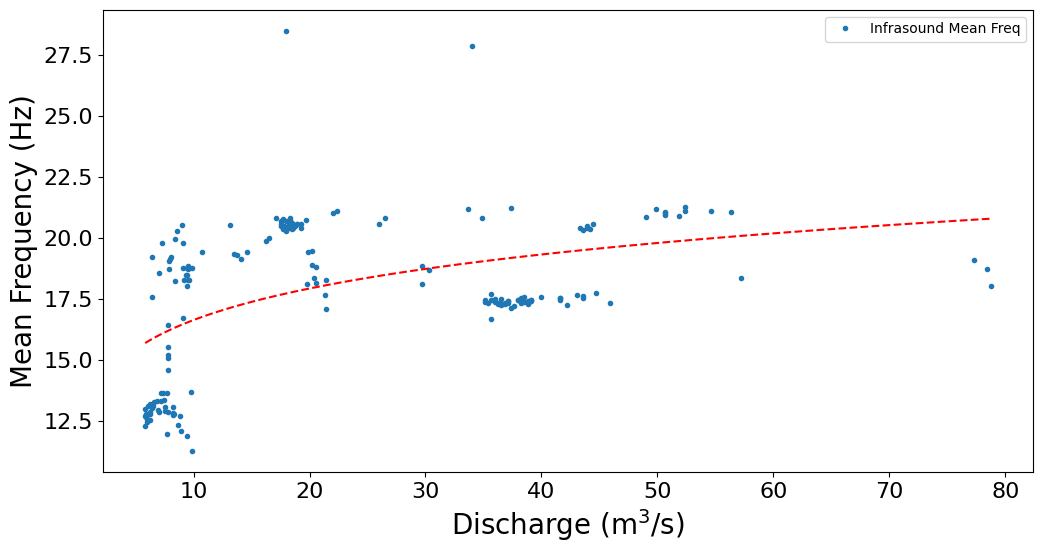

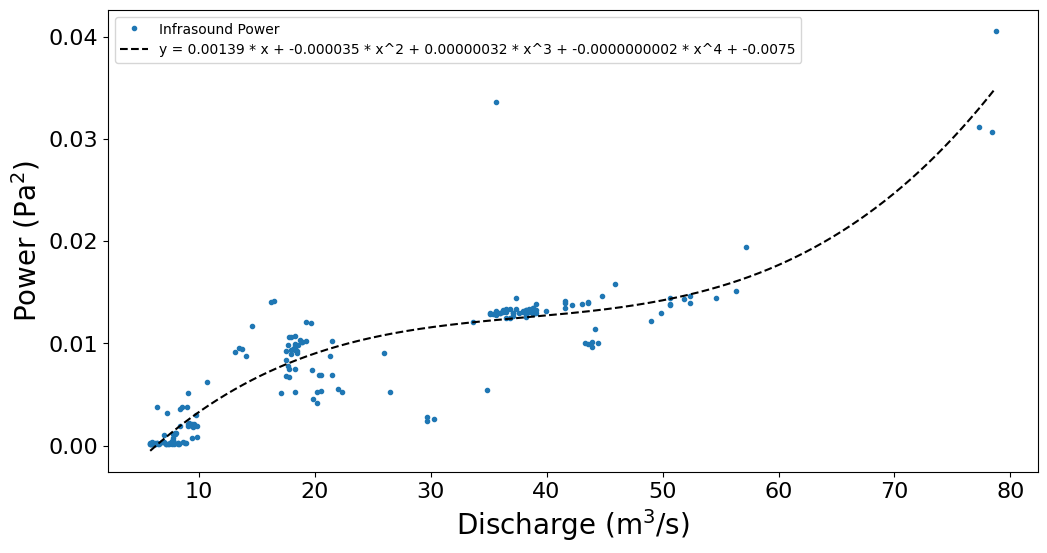

In [3]:
# fig, ax1 = plt.subplots(figsize = (12,6))
# ax1.set_title('Boise River Plunging Jet Power Rating Curves')
# ax1.set_xlabel('Discharge (m$^3$/s)', fontsize = 22)
# #ax1.set_ylabel('Power (Pa$^2$)', fontsize = 22)
# fig, ax3 = plt.subplots(figsize = (12,6))
# ax3.set_title('Boise River Plunging Jet Mean Frequency Rating Curves')
# ax3.set_xlabel('Discharge (m$^3$/s)', fontsize = 22)
# ax3.set_ylabel('Mean Frequency (Hz)', fontsize = 22)

# open each site's annual data
with open('DivDam21Spring.pickle', 'rb') as handle:
                DivDam21 = pickle.load(handle) 
with open('DivDam22Spring.pickle', 'rb') as handle:
                DivDam22 = pickle.load(handle)
#ax1.loglog(Div21['Q_infra_DivDam21Spring'], Div21['meanfreq_infra_DivDam21Spring'],'.', markersize = 10, label = 'DivDam21')
#ax1.loglog(Div22['Q_infra_DivDam22Spring'], Div22['meanfreq_infra_DivDam22Spring'],'.', markersize = 10, label = 'DivDam22') 

# concatenate multiyear data vectors
meanfreq_infra_multiyear = np.append(DivDam21['meanfreq_infra_DivDam21Spring'], DivDam22['meanfreq_infra_DivDam22Spring'])
Q_infra_multiyear = np.append(DivDam21['Q_infra_DivDam21Spring'], DivDam22['Q_infra_DivDam22Spring'])   
power_infra_multiyear = np.append(DivDam21['power_infra_nonzero_DivDam21Spring'], DivDam22['power_infra_nonzero_DivDam22Spring'])
Q_infra_multiyear_nonzero = np.append(DivDam21['Q_infra_nonzero_DivDam21Spring'], DivDam22['Q_infra_nonzero_DivDam22Spring'])

# index based on meanfreq nans
index = ([~np.isnan(meanfreq_infra_multiyear)][0])
meanfreq_infra_multiyear = meanfreq_infra_multiyear[index] 
Q_infra_multiyear = Q_infra_multiyear[index]


for degree in [10]:
    x_line_divdam_meanfreq, y_line_divdam_meanfreq, x_divdam_meanfreq, y_divdam_meanfreq = rating_curve_fit(degree, Q_infra_multiyear, meanfreq_infra_multiyear, ylabel = 'Mean Freq', s = 'Infrasound ')
for degree in [4]:
    x_line_divdam_power, y_line_divdam_power, x_divdam_power, y_divdam_power = rating_curve_fit(degree, Q_infra_multiyear_nonzero, power_infra_multiyear, ylabel = 'Power', s = 'Infrasound ')

y = -0.3 * x + 0.0 * x^2 + 29.3
y = 0.0 * x + -0.0 * x^2 + 0.0 * x^3 + -0.0 * x^4 + 0.0 * x^5


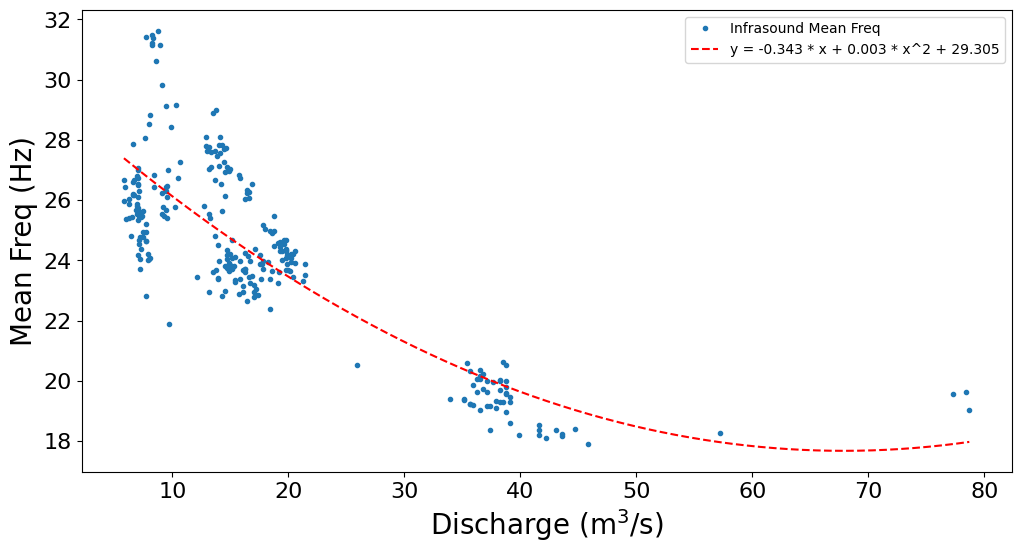

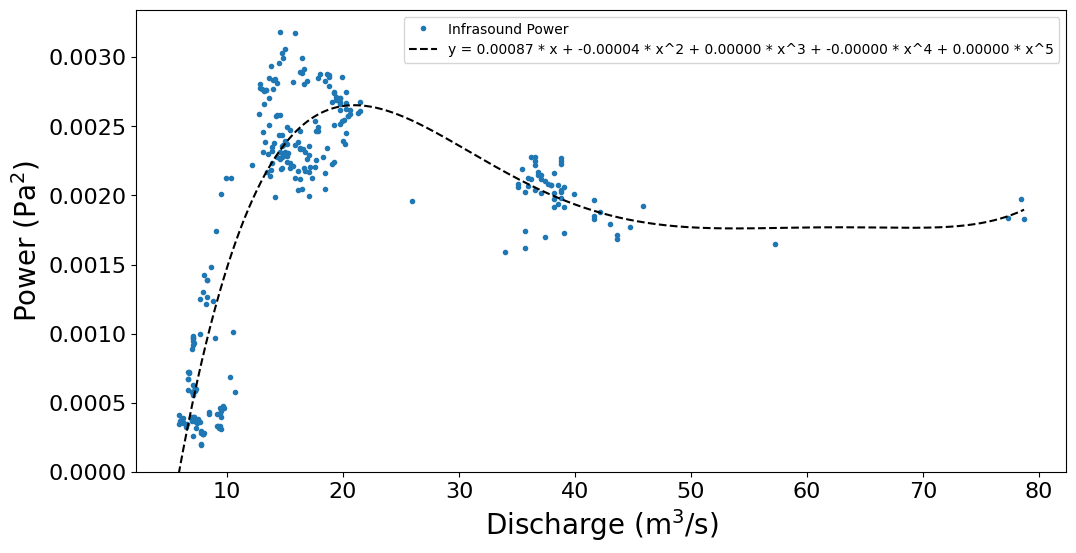

In [4]:
with open('Settlers21Spring.pickle', 'rb') as handle:
                Settlers21 = pickle.load(handle) 
with open('Settlers22Spring.pickle', 'rb') as handle:
                Settlers22 = pickle.load(handle)
#ax1.loglog(Div21['Q_infra_Settlers21Spring'], Div21['meanfreq_infra_Settlers21Spring'],'.', markersize = 10, label = 'Settlers21')
#ax1.loglog(Div22['Q_infra_Settlers22Spring'], Div22['meanfreq_infra_Settlers22Spring'],'.', markersize = 10, label = 'Settlers22') 

# concatenate multiyear data vectors
meanfreq_infra_multiyear = np.append(Settlers21['meanfreq_infra_Settlers21Spring'], Settlers22['meanfreq_infra_Settlers22Spring'])
Q_infra_multiyear = np.append(Settlers21['Q_infra_Settlers21Spring'], Settlers22['Q_infra_Settlers22Spring'])   
power_infra_multiyear = np.append(Settlers21['power_infra_nonzero_Settlers21Spring'], Settlers22['power_infra_nonzero_Settlers22Spring'])
Q_infra_multiyear_nonzero = np.append(Settlers21['Q_infra_nonzero_Settlers21Spring'], Settlers22['Q_infra_nonzero_Settlers22Spring'])

# index based on meanfreq nans
index = ([~np.isnan(meanfreq_infra_multiyear)][0])
meanfreq_infra_multiyear = meanfreq_infra_multiyear[index] 
Q_infra_multiyear = Q_infra_multiyear[index]

for degree in [2]:
    x_line_Settlers_meanfreq, y_line_Settlers_meanfreq, x_Settlers_meanfreq, y_Settlers_meanfreq = rating_curve_fit(degree, Q_infra_multiyear, meanfreq_infra_multiyear, ylabel = 'Mean Freq', s = 'Infrasound ')
for degree in [5]:    
    x_line_Settlers_power, y_line_Settlers_power, x_Settlers_power, y_Settlers_power = rating_curve_fit(degree, Q_infra_multiyear_nonzero, power_infra_multiyear, ylabel = 'Power', s = 'Infrasound ')

y = 3.5 * x + -0.2 * x^2 + 0.0 * x^3 + -0.0 * x^4 + 0.0 * x^5
[ 22.49355692   0.04945043]
y = 0.0 * x + -0.0 * x^2 + 0.0 * x^3 + -0.0 * x^4 + -0.0
[  1.76933240e-04   3.11074308e-01]


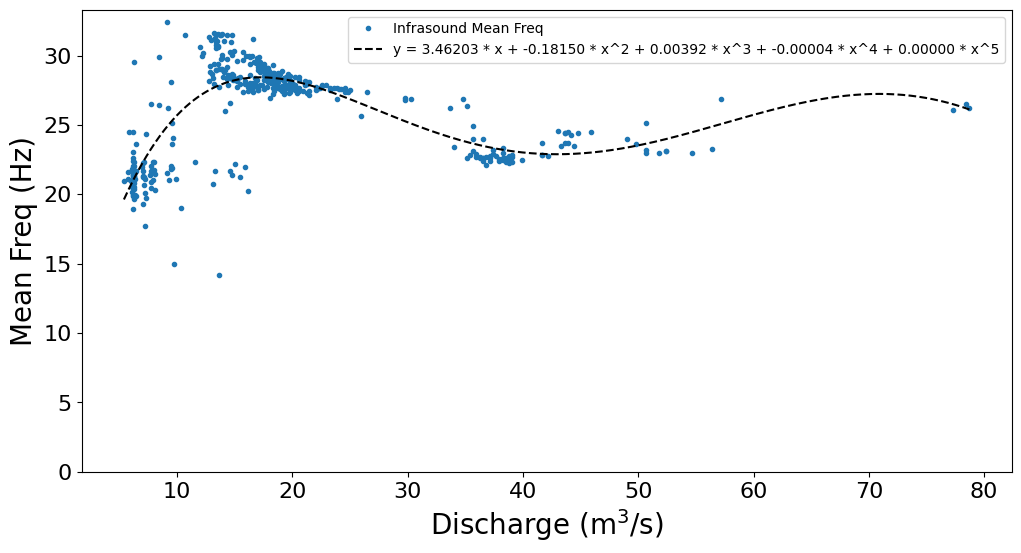

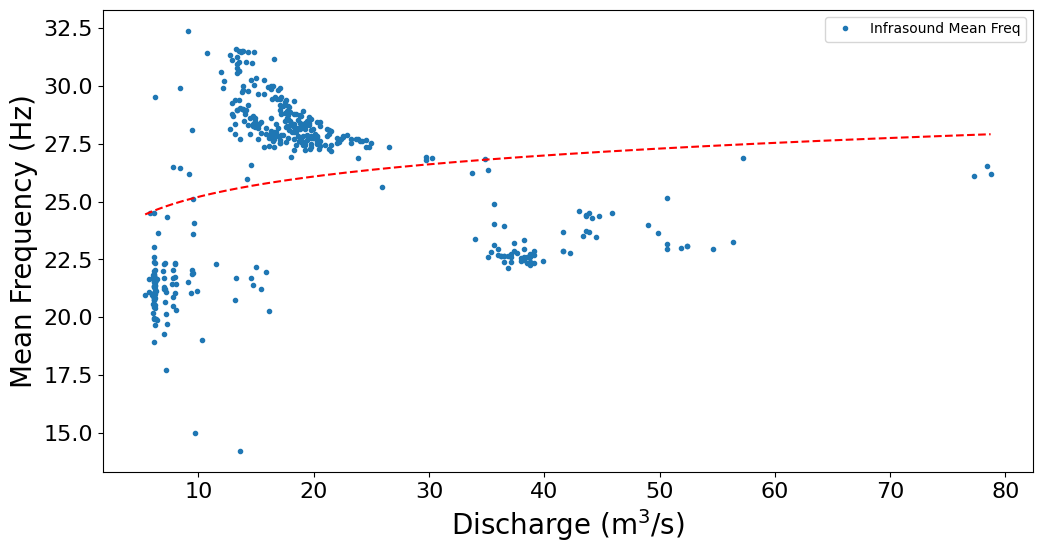

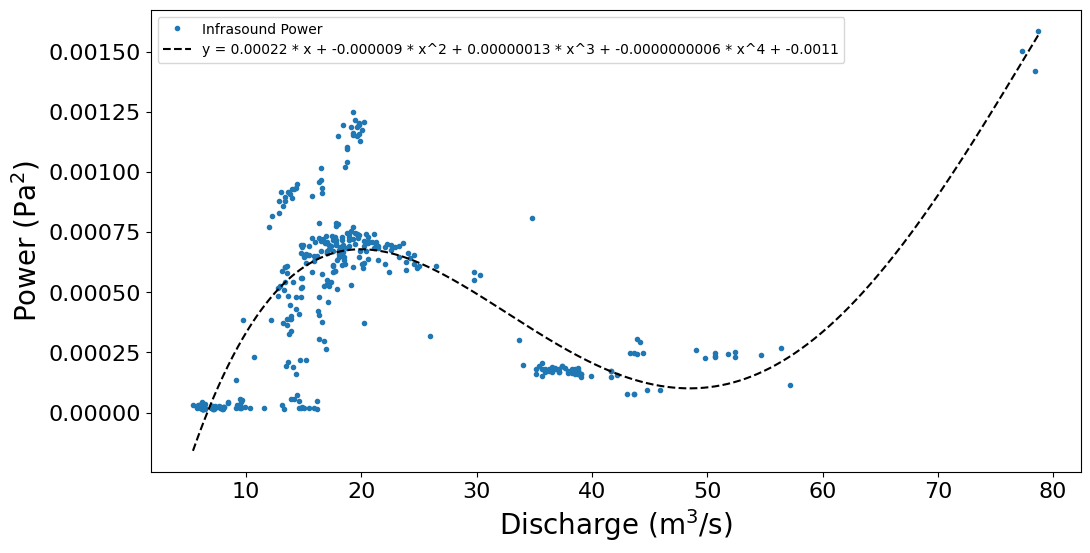

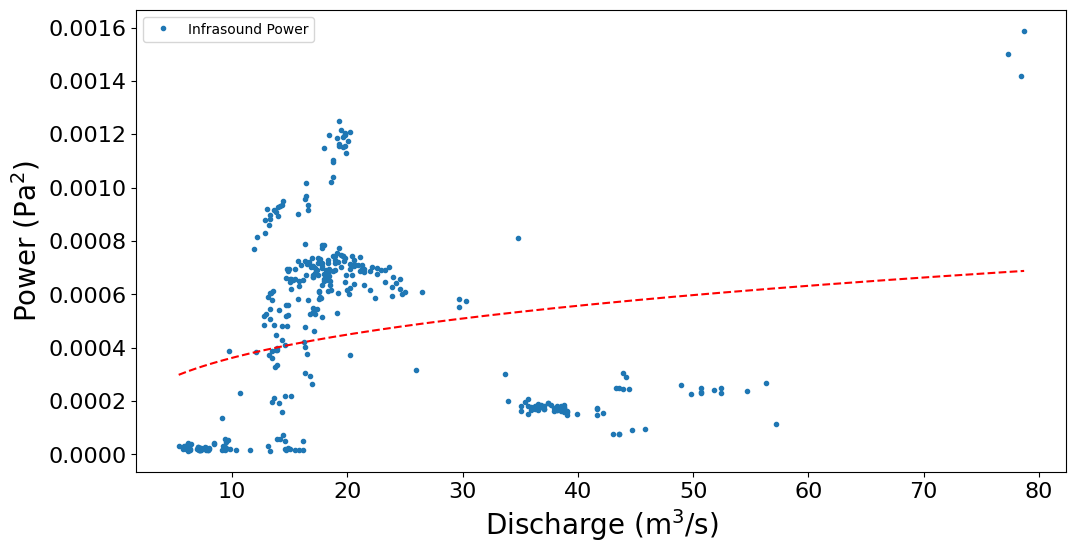

In [5]:
with open('Ridenbaugh21Spring.pickle', 'rb') as handle:
                Ridenbaugh21 = pickle.load(handle) 
with open('Ridenbaugh22Spring.pickle', 'rb') as handle:
                Ridenbaugh22 = pickle.load(handle)
#ax1.loglog(Div21['Q_infra_Ridenbaugh21Spring'], Div21['meanfreq_infra_Ridenbaugh21Spring'],'.', markersize = 10, label = 'Ridenbaugh21')
#ax1.loglog(Div22['Q_infra_Ridenbaugh22Spring'], Div22['meanfreq_infra_Ridenbaugh22Spring'],'.', markersize = 10, label = 'Ridenbaugh22') 

# concatenate multiyear data vectors
meanfreq_infra_multiyear = np.append(Ridenbaugh21['meanfreq_infra_Ridenbaugh21Spring'], Ridenbaugh22['meanfreq_infra_Ridenbaugh22Spring'])
Q_infra_multiyear = np.append(Ridenbaugh21['Q_infra_Ridenbaugh21Spring'], Ridenbaugh22['Q_infra_Ridenbaugh22Spring'])   
power_infra_multiyear = np.append(Ridenbaugh21['power_infra_nonzero_Ridenbaugh21Spring'], Ridenbaugh22['power_infra_nonzero_Ridenbaugh22Spring'])
Q_infra_multiyear_nonzero = np.append(Ridenbaugh21['Q_infra_nonzero_Ridenbaugh21Spring'], Ridenbaugh22['Q_infra_nonzero_Ridenbaugh22Spring'])

# index based on meanfreq nans
index = ([~np.isnan(meanfreq_infra_multiyear)][0])
meanfreq_infra_multiyear = meanfreq_infra_multiyear[index] 
Q_infra_multiyear = Q_infra_multiyear[index]

for degree in [5,10]:
    x_line_Ridenbaugh_meanfreq, y_line_Ridenbaugh_meanfreq, x_Ridenbaugh_meanfreq, y_Ridenbaugh_meanfreq = rating_curve_fit(degree, Q_infra_multiyear, meanfreq_infra_multiyear, ylabel = 'Mean Freq', s = 'Infrasound ')
for degree in [4,10]:    
    x_line_Ridenbaugh_power, y_line_Ridenbaugh_power, x_Ridenbaugh_power, y_Ridenbaugh_power = rating_curve_fit(degree, Q_infra_multiyear_nonzero, power_infra_multiyear, ylabel = 'Power', s = 'Infrasound ')

y = 0.0 * x + -0.0 * x^2 + 0.0
y = -3.0 * x + 0.0 * x^2 + 567.6


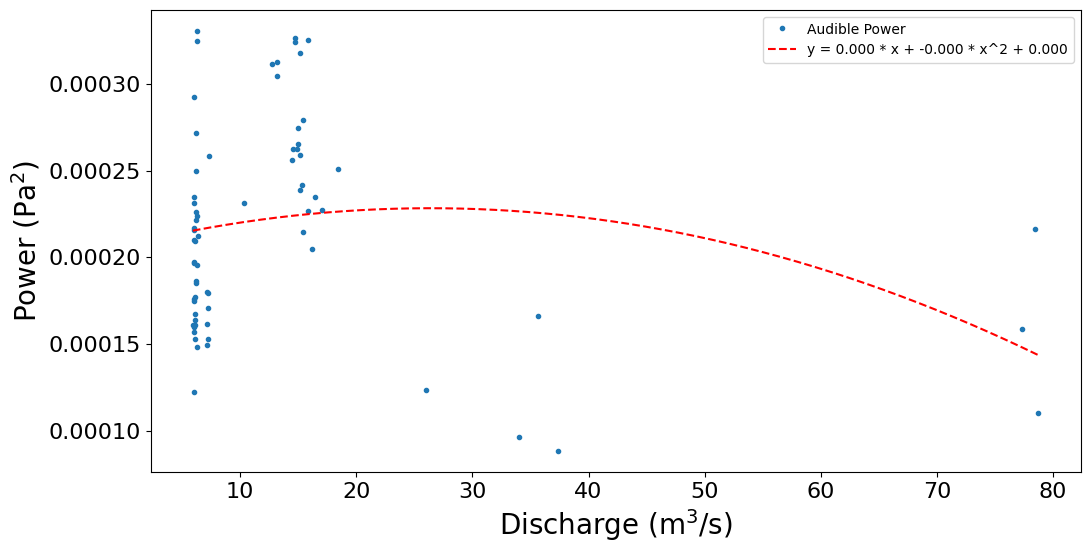

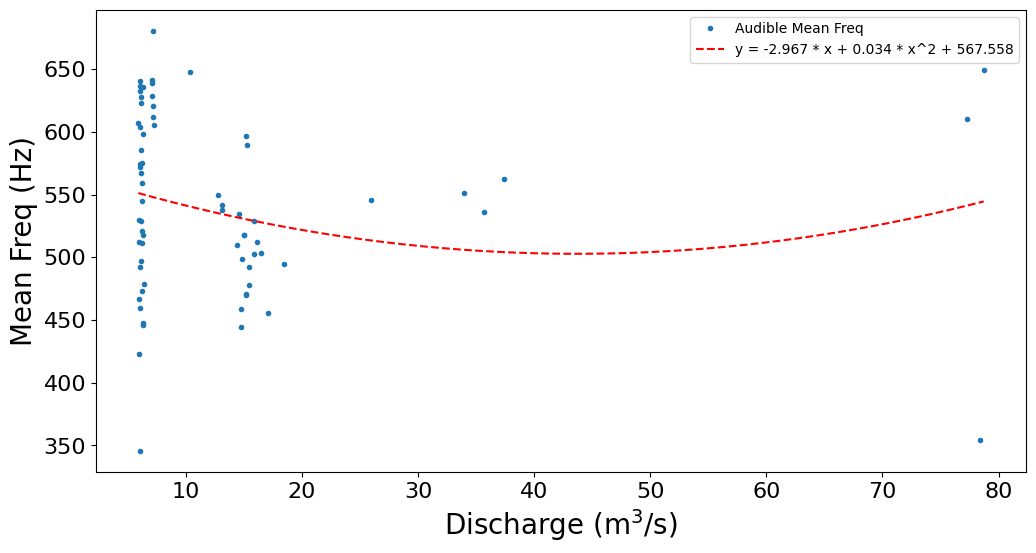

In [6]:
# with open('FB121Spring.pickle', 'rb') as handle:
#                 FB121 = pickle.load(handle) 
sites = ['FB1','FB3', 'FB4', 'FB5']

with open('FB122Spring.pickle', 'rb') as handle:
    FB122 = pickle.load(handle)
with open('FB322Spring.pickle', 'rb') as handle:
    FB322 = pickle.load(handle)
with open('FB422Spring.pickle', 'rb') as handle:
    FB422 = pickle.load(handle)
with open('FB522Spring.pickle', 'rb') as handle:
    FB522 = pickle.load(handle)    

FB1_Q = FB122['Q_aud_FB122Spring']
FB1_power = FB122['power_audible_FB122Spring']
FB1_freq = np.array(FB122['meanfreq_aud_FB122Spring'])

index = np.where(FB1_power > 0)
FB1_Q = FB1_Q[index]
FB1_power = FB1_power[index]
FB1_freq = FB1_freq[index]

for degree in [2]:
    x_line_FB1_power, y_line_FB1_power, x_FB1_power, y_FB1_power = rating_curve_fit(degree, FB1_Q, FB1_power, ylabel = 'Power', s = 'Audible ')

for degree in [2]:
    x_line_FB1_meanfreq, y_line_FB1_meanfreq, x_FB1_meanfreq, y_FB1_meanfreq = rating_curve_fit(degree, FB1_Q, FB1_freq, ylabel = 'Mean Freq', s = 'Audible ')
# concatenate multiyear data vectors
# meanfreq_infra_multiyear = np.append(FB121['meanfreq_infra_FB121Spring'], FB122['meanfreq_infra_FB122Spring'])
# Q_infra_multiyear = np.append(FB121['Q_infra_FB121Spring'], FB122['Q_infra_FB122Spring'])   
# power_infra_multiyear = np.append(FB121['power_infra_nonzero_FB121Spring'], FB122['power_infra_nonzero_FB122Spring'])
# Q_infra_multiyear_nonzero = np.append(FB121['Q_infra_nonzero_FB121Spring'], FB122['Q_infra_nonzero_FB122Spring'])

# # index based on meanfreq nans
# FB1_Q = FB1_Q[~np.isnan(FB1_Q)]
# FB1_power = FB1_power[~np.isnan(FB1_power)]
# FB1_freq = FB1_freq[~np.isnan(FB1_freq)]
# index = ([~np.isnan(meanfreq_infra_multiyear)][0])
# meanfreq_infra_multiyear = meanfreq_infra_multiyear[index] 
# Q_infra_multiyear = Q_infra_multiyear[index]



In [7]:
# FB3_Q = FB322['Q_aud_FB322Spring']
# FB3_power = FB322['power_audible_FB322Spring']
# FB3_freq = np.array(FB322['meanfreq_aud_FB322Spring'])

# index = np.where(FB3_power > 0)
# FB3_Q = FB3_Q[index]
# FB3_power = FB3_power[index]
# FB3_freq = FB3_freq[index]

# for degree in [1,4,5]:
#     x_line_FB3_meanfreq, y_line_FB3_meanfreq, x_FB3_meanfreq, y_FB3_meanfreq = rating_curve_fit(degree, FB3_Q, FB3_freq, ylabel = 'Mean Freq', s = 'Audible ')
#     x_line_FB3_power, y_line_FB3_power, x_FB3_power, y_FB3_power = rating_curve_fit(degree, FB3_Q, FB3_power, ylabel = 'Power', s = 'Audible ')

In [8]:
# FB4_Q = FB422['Q_aud_FB422Spring']
# FB4_power = FB422['power_audible_FB422Spring']
# FB4_freq = np.array(FB422['meanfreq_aud_FB422Spring'])

# index = np.where(FB4_power > 0)
# FB4_Q = FB4_Q[index]
# FB4_power = FB4_power[index]
# FB4_freq = FB4_freq[index]

# for degree in [1,4,5]:
#     x_line_FB4_meanfreq, y_line_FB4_meanfreq, x_FB4_meanfreq, y_FB4_meanfreq = rating_curve_fit(degree, FB4_Q, FB4_freq, ylabel = 'Mean Freq', s = 'Audible ')
#     x_line_FB4_power, y_line_FB4_power, x_FB4_power, y_FB4_power = rating_curve_fit(degree, FB4_Q, FB4_power, ylabel = 'Power', s = 'Audible ')

y = 6.9 * x + -0.1 * x^2 + 414.3
y = 0.0 * x + -0.0 * x^2 + 0.0


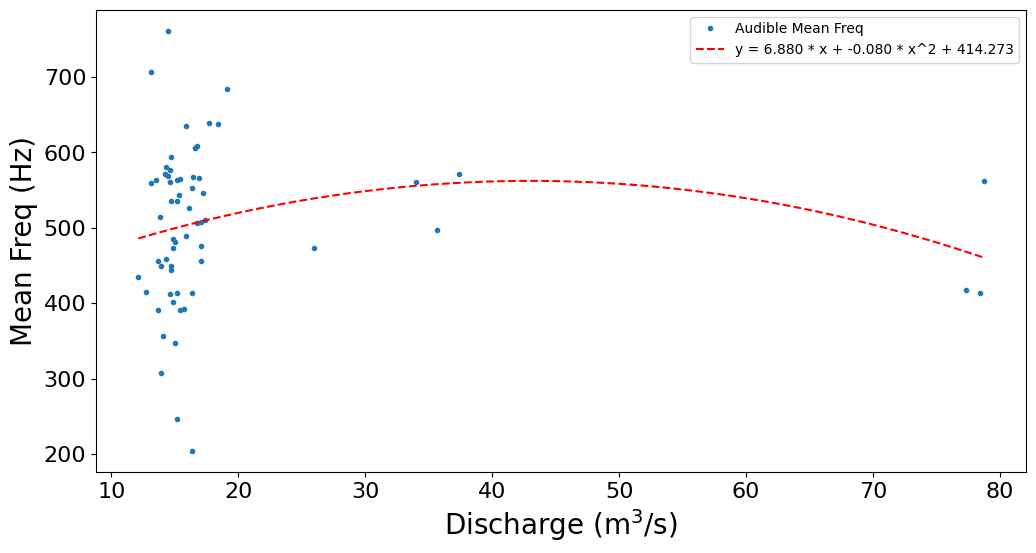

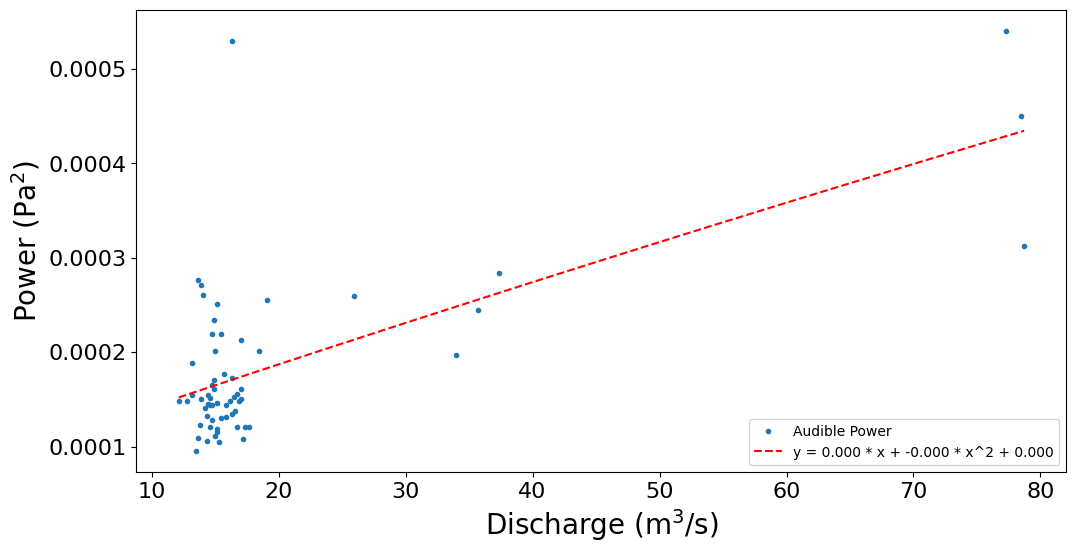

In [7]:
FB5_Q = FB522['Q_aud_FB522Spring']
FB5_power = FB522['power_audible_FB522Spring']
FB5_freq = np.array(FB522['meanfreq_aud_FB522Spring'])

index = np.where(FB5_power > 0)
FB5_Q = FB5_Q[index]
FB5_power = FB5_power[index]
FB5_freq = FB5_freq[index]

for degree in [2]:
    x_line_FB5_meanfreq, y_line_FB5_meanfreq, x_FB5_meanfreq, y_FB5_meanfreq = rating_curve_fit(degree, FB5_Q, FB5_freq, ylabel = 'Mean Freq', s = 'Audible ')
    x_line_FB5_power, y_line_FB5_power, x_FB5_power, y_FB5_power = rating_curve_fit(degree, FB5_Q, FB5_power, ylabel = 'Power', s = 'Audible ')

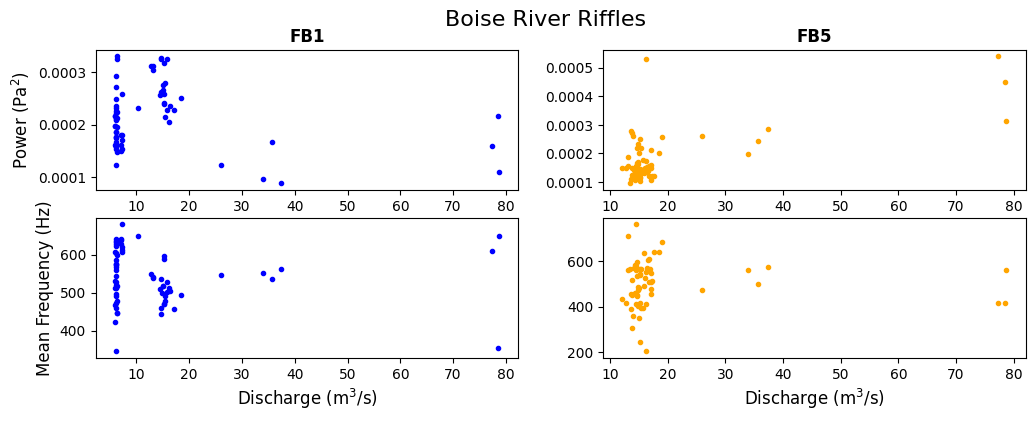

In [8]:
#boise_meanfreq, ax0 = plt.subplots(figsize = (12,6))
#ax0.tick_params(axis='x', labelsize=16)
#ax0.tick_params(axis='y', labelsize=16)
#ax0.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
#ax0.set_ylabel('Audible Mean Freq (Hz)', fontsize = 20)
#ax0.set_title('Boise River Riffle Frequency Model Curves')

#ax0.plot(x_line_FB1_meanfreq, y_line_FB1_meanfreq, label = 'FB1', color = 'blue')
#ax0.fill_between(x_FB1_meanfreq, y_FB1_meanfreq + np.std(y_FB1_meanfreq)/2, y_FB1_meanfreq - np.std(y_FB1_meanfreq)/2, alpha = 0.1)
#ax0.plot(x_line_FB3_meanfreq, y_line_FB3_meanfreq, label = 'FB3')
#ax0.plot(x_line_FB4_meanfreq, y_line_FB4_meanfreq, label = 'FB4')
#ax0.plot(x_line_FB5_meanfreq, y_line_FB5_meanfreq, label = 'FB5', color = 'orange')
#ax0.fill_between(x_FB5_meanfreq, y_FB5_meanfreq + np.std(y_FB5_meanfreq)/2, y_FB5_meanfreq - np.std(y_FB5_meanfreq)/2, alpha = 0.1)
#ax0.legend()

#boise_power, ax00 = plt.subplots(figsize = (12,6))
#ax00.tick_params(axis='x', labelsize=16)
#ax00.tick_params(axis='y', labelsize=16)
#ax00.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
#ax00.set_ylabel('Audible Power (Pa$^2$)', fontsize = 20)
#ax00.set_title('Boise River Riffle Power Model Curves')

#ax00.plot(x_line_FB1_power, y_line_FB1_power, label = 'FB1', color = 'blue')
#ax00.fill_between(x_FB1_power, y_FB1_power + np.std(y_FB1_power)/2, y_FB1_power - np.std(y_FB1_power)/2, alpha = 0.1)
#ax00.semilogy(x_line_FB3_power, y_line_FB3_power, label = 'FB3')
#ax00.semilogy(x_line_FB4_power, y_line_FB4_power, label = 'FB4')
#ax00.plot(x_line_FB5_power, y_line_FB5_power, label = 'FB5', color = 'orange')
#ax00.fill_between(x_FB5_power, y_FB5_power + np.std(y_FB5_power)/2, y_FB5_power - np.std(y_FB5_power)/2, alpha = 0.1)
#ax00.legend()

extra_fig, ax1 = plt.subplots(2,2, figsize = (12,4))
plt.suptitle('Boise River Riffles', fontsize = 16)
ax1[0,0].plot(x_FB1_power, y_FB1_power, '.', label = 'FB1', color = 'blue')
#ax1[0,0].plot(x_line_FB1_power, y_line_FB1_power, '-', label = 'FB1 Power model', color = 'blue')

ax1[1,0].plot(x_FB1_meanfreq, y_FB1_meanfreq,'.', label = 'FB1', color = 'blue')
#ax1[1,0].plot(x_line_FB1_meanfreq, y_line_FB1_meanfreq,'-', label = 'FB1 Frequency model', color = 'blue')

ax1[0,1].plot(x_FB5_power, y_FB5_power, '.', label = 'FB5', color = 'orange')
#ax1[0,1].plot(x_line_FB5_power, y_line_FB5_power, '-', label = 'FB5 Power model', color = 'orange')

ax1[1,1].plot(x_FB5_meanfreq, y_FB5_meanfreq, '.', label = 'FB5', color = 'orange')
#ax1[1,1].plot(x_line_FB5_meanfreq, y_line_FB5_meanfreq, '-', label = 'FB5 Frequency model', color = 'orange')

ax1[0,0].set_ylabel('Power (Pa$^2$)', fontsize = 12)
ax1[1,0].set_ylabel('Mean Frequency (Hz)', fontsize = 12)
ax1[1,0].set_xlabel('Discharge (m$^3$/s)', fontsize = 12)
ax1[1,1].set_xlabel('Discharge (m$^3$/s)', fontsize = 12)

ax1[0,0].set_title('FB1', fontsize = 12, fontweight = 'bold')
ax1[0,1].set_title('FB5', fontsize = 12, fontweight = 'bold')
# loc= 'upper center')
extra_fig.savefig(fname = '/home/scott/bender/gradschool/publication/new_figs/1-31-24_figs/Boise_riffles.jpg', format = 'jpg', bbox_inches = 'tight')


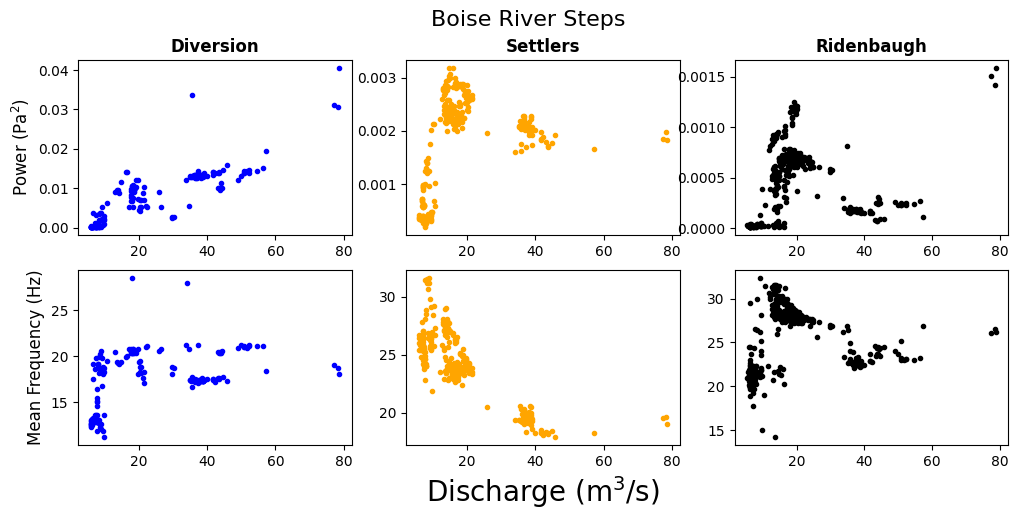

In [9]:
# PLOT ERRYTHANG
# boise_meanfreq, ax0 = plt.subplots(figsize = (12,6))
# ax0.tick_params(axis='x', labelsize=16)
# ax0.tick_params(axis='y', labelsize=16)
# ax0.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
# ax0.set_ylabel('Infrasound Mean Freq (Hz)', fontsize = 20)
# ax0.set_title('Boise River Step Frequency Model Curves')

# ax0.plot(x_line_divdam_meanfreq, y_line_divdam_meanfreq, label = 'Diversion', color = 'blue')
# ax0.plot(x_line_Settlers_meanfreq, y_line_Settlers_meanfreq, label = 'Settlers', color = 'orange')
# ax0.plot(x_line_Ridenbaugh_meanfreq, y_line_Ridenbaugh_meanfreq, label = 'Ridenbaugh', color = 'black')
# ax0.legend()

# boise_power, ax00 = plt.subplots(figsize = (12,6))
# ax00.tick_params(axis='x', labelsize=16)
# ax00.tick_params(axis='y', labelsize=16)
# ax00.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
# ax00.set_ylabel('Infrasound Power (Pa$^2$)', fontsize = 20)
# ax00.set_title('Boise River Step Power Model Curves')

# ax00.semilogy(x_line_divdam_power, y_line_divdam_power, label = 'Diversion', color = 'blue')
# ax00.semilogy(x_line_Settlers_power, y_line_Settlers_power, label = 'Settlers', color = 'orange')
# ax00.semilogy(x_line_Ridenbaugh_power, y_line_Ridenbaugh_power, label = 'Ridenbaugh', color = 'black')
# ax00.legend()
# ax00.set_ylim(5*10**-5)

extra_fig1, ax11 = plt.subplots(2,3, figsize = (12,5))
plt.suptitle('Boise River Steps', fontsize = 16)

ax11[0,0].plot(x_divdam_power, y_divdam_power, '.', label = 'Diversion', color = 'blue')
#ax11[0,0].plot(x_line_divdam_power, y_line_divdam_power, '-', color = 'blue')
ax11[1,0].plot(x_divdam_meanfreq, y_divdam_meanfreq,'.', label = 'Diversion', color = 'blue')
#ax11[1,0].plot(x_line_divdam_meanfreq, y_line_divdam_meanfreq,'-', color = 'blue')


ax11[0,1].plot(x_Settlers_power, y_Settlers_power, '.', label = 'Settlers', color = 'orange')
#ax11[0,1].plot(x_line_Settlers_power, y_line_Settlers_power, '-', color = 'orange')
ax11[1,1].plot(x_Settlers_meanfreq, y_Settlers_meanfreq, '.', label = 'Settlers', color = 'orange')
#ax11[1,1].plot(x_line_Settlers_meanfreq, y_line_Settlers_meanfreq, '-', color = 'orange')

ax11[0,2].plot(x_Ridenbaugh_power, y_Ridenbaugh_power, '.', label = 'Ridenbaugh', color = 'black')
#ax11[0,2].plot(x_line_Ridenbaugh_power, y_line_Ridenbaugh_power, '-', label = 'FB5 Power model', color = 'black')
ax11[1,2].plot(x_Ridenbaugh_meanfreq, y_Ridenbaugh_meanfreq, '.', label = 'Ridenbaugh', color = 'black')
#ax11[1,2].plot(x_line_Ridenbaugh_meanfreq, y_line_Ridenbaugh_meanfreq, '-', label = 'FB5 Frequency model', color = 'black')
#x_line_divdam_meanfreq, y_line_divdam_meanfreq, x_divdam_meanfreq, y_divdam_meanfreq


ax11[0,0].set_ylabel('Power (Pa$^2$)', fontsize = 12)
ax11[1,0].set_ylabel('Mean Frequency (Hz)', fontsize = 12)
ax11[1,1].set_xlabel('Discharge (m$^3$/s)', fontsize = 20)

ax11[0,0].set_title('Diversion', fontsize = 12, fontweight = 'bold')
ax11[0,1].set_title('Settlers', fontsize = 12, fontweight = 'bold')
ax11[0,2].set_title('Ridenbaugh', fontsize = 12, fontweight = 'bold')

extra_fig1.savefig(fname = '/home/scott/bender/gradschool/publication/new_figs/1-31-24_figs/Boise_steps.jpg', format = 'jpg', bbox_inches = 'tight')

#ax11[0,0].legend(fontsize = 10, loc= 'upper center')
#ax11[0,1].legend(fontsize = 10, loc= 'upper center')
#ax11[1,0].legend(fontsize = 10, loc= 'upper center')
#ax11[1,1].legend(fontsize = 10, loc= 'upper center')
#ax11[1,2].legend(fontsize = 10, loc= 'upper center')
#ax11[0,2].legend(fontsize = 10, loc= 'upper center')

#r2_pow_ridenbaugh = r2_score([x_divdam_power, y_divdam_power],[x_line_divdam_power, y_line_divdam_power])
#r2_freq_ridenbaugh = r2_score([x_divdam_meanfreq, y_divdam_meanfreq],[x_line_divdam_meanfreq, y_line_divdam_meanfreq])
#r2_pow_ridenbaugh = r2_score([x_divdam_power, y_divdam_power],[x_line_divdam_power, y_line_divdam_power])
#r2_pow_ridenbaugh = r2_score([x_divdam_power, y_divdam_power],[x_line_divdam_power, y_line_divdam_power])

y = -112180.4 * x + 1208951.4 * x^2 + -5302717.6 * x^3 + 7994416.5 * x^4 + 4757.2
y = -0.0 * x + 0.3 * x^2 + -1.0 * x^3 + 0.9 * x^4 + 0.0


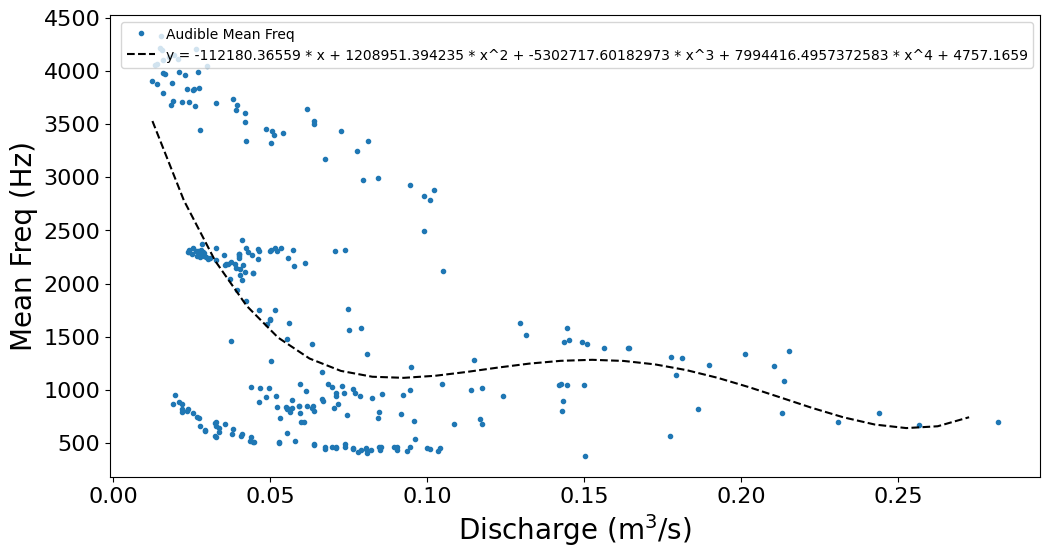

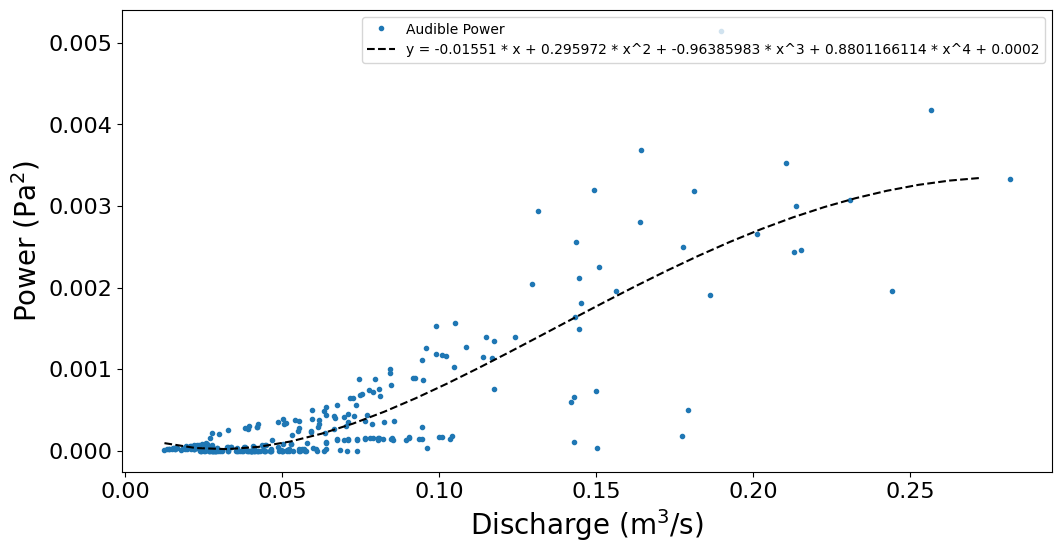

In [10]:

with open('CON1E21Spring.pickle', 'rb') as handle:
    CON1E21 = pickle.load(handle)
with open('CON1E22Spring.pickle', 'rb') as handle:
    CON1E22 = pickle.load(handle)
  

CON1E_Q = np.append(CON1E21['Q_aud_CON1E21Spring'],CON1E22['Q_aud_CON1E22Spring'])
CON1E_power = np.append(CON1E21['power_audible_CON1E21Spring'],CON1E22['power_audible_CON1E22Spring'], )
CON1E_freq = np.append(CON1E21['meanfreq_aud_CON1E21Spring'],CON1E22['meanfreq_aud_CON1E22Spring'])

index = np.where(CON1E_power > 0)
CON1E_Q = CON1E_Q[index]
CON1E_power = CON1E_power[index]
CON1E_freq = CON1E_freq[index]

for degree in [4]:
    x_line_CON1E_meanfreq, y_line_CON1E_meanfreq, x_CON1E_meanfreq, y_CON1E_meanfreq = rating_curve_fit(degree, CON1E_Q, CON1E_freq, ylabel = 'Mean Freq', s = 'Audible ')
    x_line_CON1E_power, y_line_CON1E_power, x_CON1E_power, y_CON1E_power = rating_curve_fit(degree, CON1E_Q, CON1E_power, ylabel = 'Power', s = 'Audible ')


/home/scott/anaconda3/envs/gem/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


y = -346633.8 * x + 20914300.7 * x^2 + -538732918.5 * x^3 + 4989159963.0 * x^4 + 1.0 * x^5
y = 0.0 * x + -0.0 * x^2 + -0.0


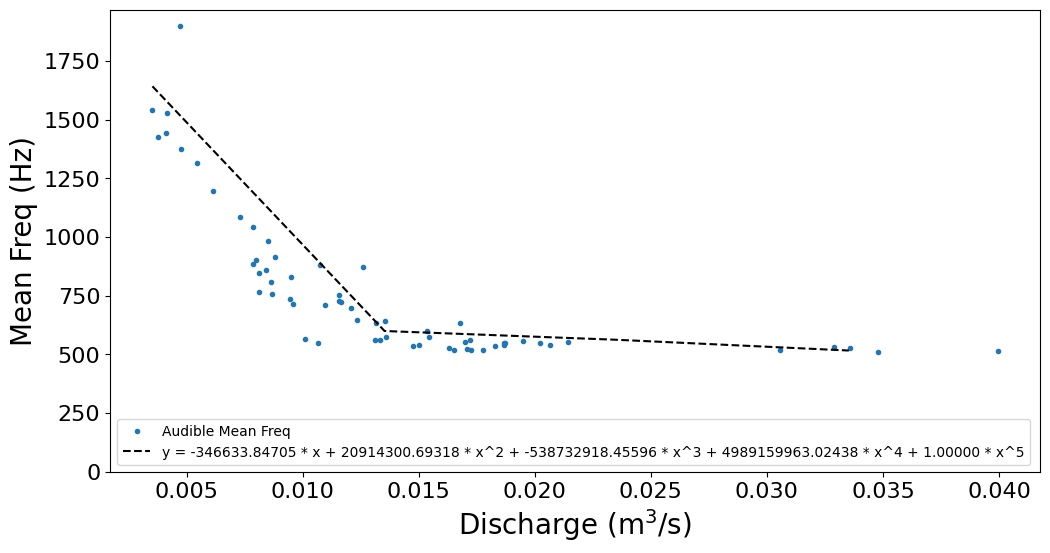

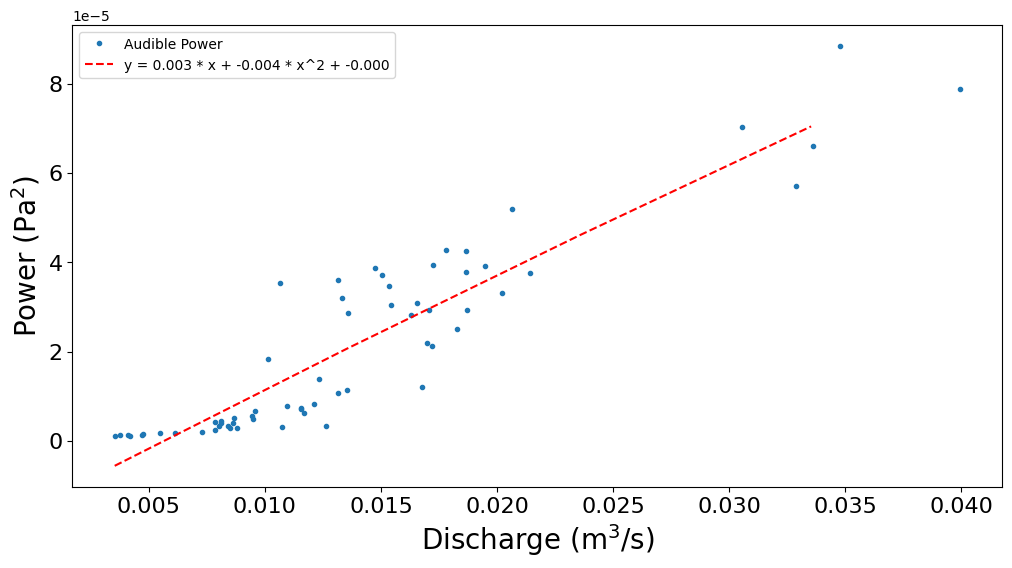

In [11]:
with open('CON1W21Spring.pickle', 'rb') as handle:
    CON1W21 = pickle.load(handle)
with open('CON1W22Spring.pickle', 'rb') as handle:
    CON1W22 = pickle.load(handle)
  

CON1W_Q = np.array(CON1W21['Q_aud_CON1W21Spring'])
CON1W_power = np.array(CON1W21['power_audible_CON1W21Spring'])
CON1W_freq = np.array(CON1W21['meanfreq_aud_CON1W21Spring'])

index = np.where(CON1W_power > 0)
CON1W_Q = CON1W_Q[index]
CON1W_power = CON1W_power[index]
CON1W_freq = CON1W_freq[index]

for degree in [5]:
    x_line_CON1W_meanfreq, y_line_CON1W_meanfreq, x_CON1W_meanfreq, y_CON1W_meanfreq = rating_curve_fit(degree, CON1W_Q, CON1W_freq, ylabel = 'Mean Freq', s = 'Audible ')
for degree in [2]:   
    x_line_CON1W_power, y_line_CON1W_power, x_CON1W_power, y_CON1W_power = rating_curve_fit(degree, CON1W_Q, CON1W_power, ylabel = 'Power', s = 'Audible ')


y = 92.3 * x + -3939.6 * x^2 + 10027.2 * x^3 + 375.8
y = -0.0 * x + 0.0
y = 0.0 * x + -0.0 * x^2 + 0.0


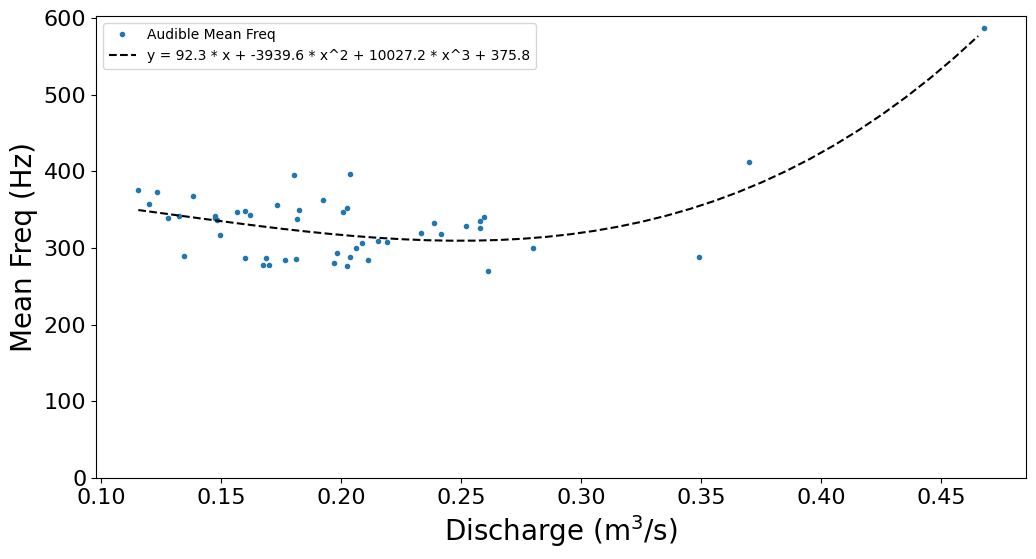

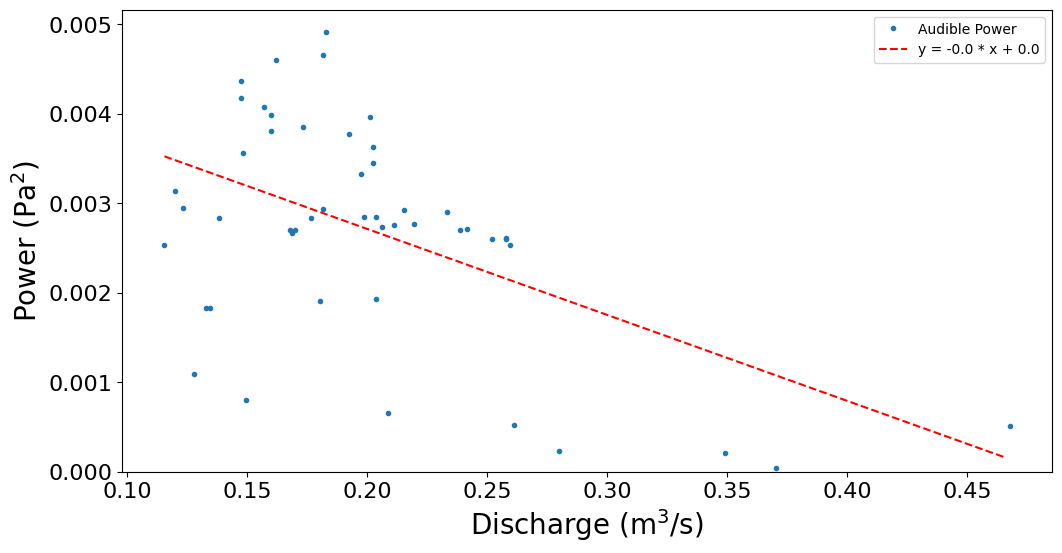

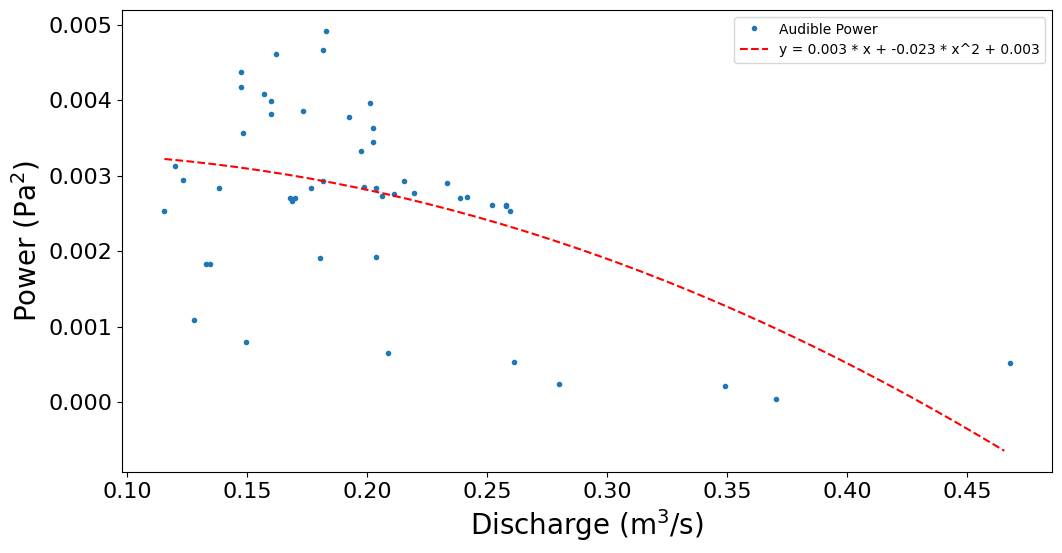

In [12]:
# with open('LG22Spring.pickle', 'rb') as handle:
#     LG22 = pickle.load(handle)
with open('LG22Spring.pickle', 'rb') as handle:
    LG22 = pickle.load(handle)
  

LG_Q = np.array(LG22['Q_aud_LG22Spring'])
LG_power = np.array(LG22['power_audible_LG22Spring'])
LG_freq = np.array(LG22['meanfreq_aud_LG22Spring'])

index = np.where(LG_power > 0)
LG_Q = LG_Q[index]
LG_power = LG_power[index]
LG_freq = LG_freq[index]

for degree in [3]:
    x_line_LG_meanfreq, y_line_LG_meanfreq, x_LG_meanfreq, y_LG_meanfreq = rating_curve_fit(degree, LG_Q, LG_freq, ylabel = 'Mean Freq', s = 'Audible ')
for degree in [1,2]:   
    x_line_LG_power, y_line_LG_power, x_LG_power, y_LG_power = rating_curve_fit(degree, LG_Q, LG_power, ylabel = 'Power', s = 'Audible ')

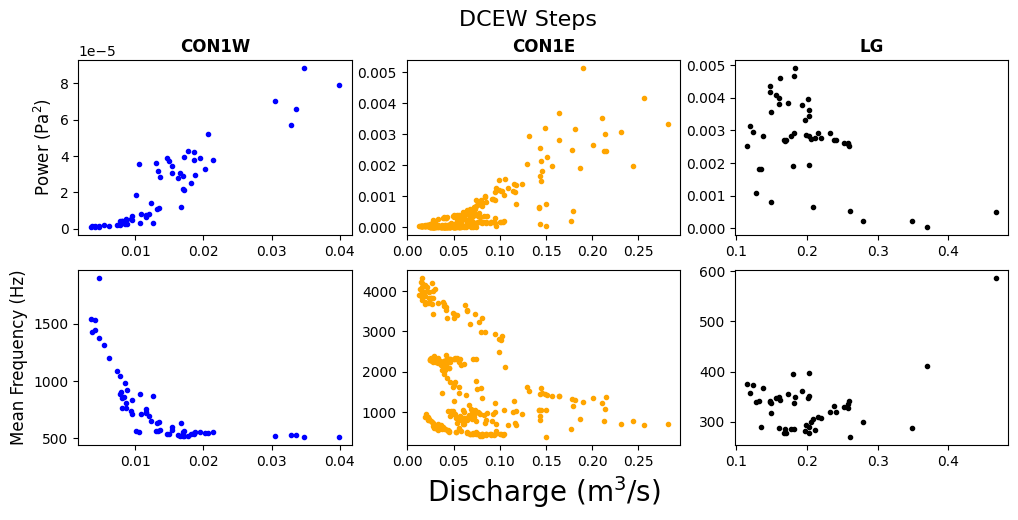

In [13]:
# dcew_meanfreq, ax0 = plt.subplots(figsize = (12,6))
# ax0.tick_params(axis='x', labelsize=16)
# ax0.tick_params(axis='y', labelsize=16)
# ax0.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
# ax0.set_ylabel('Audible Mean Freq (Hz)', fontsize = 20)
# ax0.set_title('DCEW Step Frequency Model Curves')

# ax0.loglog(x_line_LG_meanfreq, y_line_LG_meanfreq, label = 'LG', color = 'black')
# ax0.loglog(x_line_CON1E_meanfreq, y_line_CON1E_meanfreq, label = 'CON1E', color = 'orange')
# ax0.loglog(x_line_CON1W_meanfreq, y_line_CON1W_meanfreq, label = 'CON1W', color = 'blue')
# ax0.legend()

# dcew_power, ax00 = plt.subplots(figsize = (12,6))
# ax00.tick_params(axis='x', labelsize=16)
# ax00.tick_params(axis='y', labelsize=16)
# ax00.set_xlabel('Discharge (m$^3$/s)', fontsize = 20)
# ax00.set_ylabel('LG & CON1E Audible Power (Pa$^2$)', fontsize = 20)
# ax00.set_title('DCEW Step Power Model Curves')

# ax00.plot(x_line_LG_power, y_line_LG_power, label = 'LG', color = 'black')
# ax00.plot(x_line_CON1E_power, y_line_CON1E_power, label = 'CON1E', color = 'orange')
# axc1w = ax00.twinx()
# axc1w.tick_params(axis='y', labelsize=16)
# axc1w.set_ylabel('CON1W Audible Power (Pa$^2$)', fontsize = 20)    
        
# axc1w.loglog(x_line_CON1W_power, y_line_CON1W_power, label = 'CON1W', color = 'blue')
# #axc1w.legend()
# axc1w.set_ylim(0)
# ax00.set_ylim(0)
# ax00.set_xlim(10**-2)
# dcew_power.legend(loc= (0.81,0.81))

extra_fig2, ax22 = plt.subplots(2,3, figsize = (12,5))
plt.suptitle('DCEW Steps', fontsize = 16)

ax22[0,0].plot(x_CON1W_power, y_CON1W_power, '.', label = 'CON1W', color = 'blue')
#ax22[0,0].plot(x_line_CON1W_power, y_line_CON1W_power, '-', color = 'blue')
ax22[1,0].plot(x_CON1W_meanfreq, y_CON1W_meanfreq,'.', label = 'CON1W', color = 'blue')
#ax22[1,0].plot(x_line_CON1W_meanfreq, y_line_CON1W_meanfreq,'-', color = 'blue')


ax22[0,1].plot(x_CON1E_power, y_CON1E_power, '.',label = 'CON1E',color = 'orange')
#ax22[0,1].plot(x_line_CON1E_power, y_line_CON1E_power, '-', color = 'orange')
ax22[1,1].plot(x_CON1E_meanfreq, y_CON1E_meanfreq, '.', label = 'CON1E', color = 'orange')
#ax22[1,1].plot(x_line_CON1E_meanfreq, y_line_CON1E_meanfreq, '-', color = 'orange')

ax22[0,2].plot(x_LG_power, y_LG_power, '.', label = 'LG',color = 'black')
#ax22[0,2].plot(x_line_LG_power, y_line_LG_power, '-', color = 'black')
ax22[1,2].plot(x_LG_meanfreq, y_LG_meanfreq, '.', label = 'LG', color = 'black')
#ax22[1,2].plot(x_line_LG_meanfreq, y_line_LG_meanfreq, '-', color = 'black')

ax22[0,0].set_ylabel('Power (Pa$^2$)', fontsize = 12)
ax22[1,0].set_ylabel('Mean Frequency (Hz)', fontsize = 12)
ax22[1,1].set_xlabel('Discharge (m$^3$/s)', fontsize = 20)

ax22[0,0].set_title('CON1W', fontsize = 12, fontweight = 'bold')
ax22[0,1].set_title('CON1E', fontsize = 12, fontweight = 'bold')
ax22[0,2].set_title('LG', fontsize = 12, fontweight = 'bold')

extra_fig2.savefig(fname = '/home/scott/bender/gradschool/publication/new_figs/1-31-24_figs/DCEW_steps.jpg', format = 'jpg', bbox_inches = 'tight')

#ax22[0,0].legend(fontsize = 10, loc= 'upper center')
#ax22[0,1].legend(fontsize = 10, loc= 'upper center')
#ax22[1,0].legend(fontsize = 10, loc= 'upper center')
#ax22[1,1].legend(fontsize = 10, loc= 'upper center')
#ax22[1,2].legend(fontsize = 10, loc= 'upper center')
#ax22[0,2].legend(fontsize = 10, loc= 'upper center')

In [23]:
np.min(CON1E_power)

2.5489992742436921e-07

In [24]:
np.min(CON1W_power)

1.0656748163393508e-06

In [66]:
# save to dictionary and pickle
import pickle
import os
print(os.getcwd()) # pickles are saved to cwd

Dictionary = {}
# Dictionary['power_infra_' + site + year + season] = power_infrasound

# mean freq variables
Dictionary['x_line_divdam_meanfreq'] = x_line_divdam_meanfreq
Dictionary['y_line_divdam_meanfreq'] = y_line_divdam_meanfreq
Dictionary['x_divdam_meanfreq'] = x_divdam_meanfreq
Dictionary['y_divdam_meanfreq'] = y_divdam_meanfreq

# power variables 
Dictionary['x_line_divdam_power'] = x_line_divdam_power
Dictionary['y_line_divdam_power'] = y_line_divdam_power
Dictionary['x_divdam_power'] = x_divdam_power
Dictionary['y_divdam_power'] = y_divdam_power

# pickle varibles if necessary
# with open(site + year + season + '.pickle', 'wb') as handle:
#     pickle.dump(Dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open(site + year + season + '.pickle', 'rb') as handle:
#     b = pickle.load(handle)


/home/scott/bender/gradschool/code/riversound/examples/Spring_2022_code/Boise_dams
